## Amazon Product Reviews' Sentiment Analysis with an RNN

# Contributors:
#### 1. Shagun Seth (055042)
#### 2. Sweta Behera (055051)
#### **{Group 27}**

## Problem Statement
Customer reviews on e-commerce platforms like Amazon contain valuable insights about user experiences. However, manually analyzing thousands of reviews is impractical. This project aims to automate sentiment analysis using deep learning techniques, specifically recurrent neural networks (RNNs), to classify reviews as positive or negative. The insights gained can help businesses improve customer satisfaction, manage brand reputation, and make data-driven decisions.

## Abstract
This study implements a sentiment analysis model using LSTM-based RNNs to classify Amazon customer reviews. The dataset undergoes thorough preprocessing, including stopword removal, tokenization, and padding. The model is trained using word embeddings (GloVe) and evaluated using accuracy and loss metrics. Balancing techniques, such as SMOTE, are used to address data imbalance. The final model achieves an accuracy of **96.37%**, demonstrating its effectiveness in understanding sentiment trends. The report discusses key findings, challenges, managerial implications, and future improvements.

## Dataset Description
- **Source:** Amazon product reviews dataset
- **Attributes:**
  - Verified Reviews: Textual customer feedback
  - Feedback: Sentiment labels (0 = Negative, 1 = Positive)
  - Additional Metadata: Includes product details, timestamps (if applicable)
- **Preprocessing Applied:**
  - Removed stopwords (except key negative words like "not," "bad")
  - Cleaned special characters and numbers
  - Tokenized text into word sequences
  - Converted text to numerical sequences using word embeddings

## Steps Performed in the Analysis
### Data Preprocessing:
- Cleaned and tokenized text
- Removed irrelevant words while preserving sentiment-determining words
- Applied padding to standardize input length

### Exploratory Data Analysis (EDA):
- Visualized sentiment distribution
- Generated word clouds for positive and negative reviews
- Analyzed word frequency distributions for different sentiment classes

### Handling Class Imbalance:
- Used SMOTE to oversample minority class
- Verified balance improvement using class distribution plots

### Feature Extraction:
- Implemented word embeddings using GloVe
- Compared performance with TF-IDF-based feature extraction

### Model Development:
- Implemented bidirectional LSTM-based RNN
- Applied dropout and batch normalization
- Used early stopping and learning rate decay
- Fine-tuned hyperparameters using grid search

### Model Training and Evaluation:
- Split dataset into 80% training and 20% testing
- Evaluated using accuracy, loss, and confusion matrix
- Compared multiple architectures: CNN, LSTM, BiLSTM
- Selected BiLSTM as the best model based on performance

### Results Visualization:
- Plotted accuracy and loss trends over epochs
- Displayed word distributions and sentiment polarity trends
- Examined misclassified samples for error analysis

## Observations from the Model
- **Test accuracy achieved:** **96.37%**
- **Training Loss:** **0.1198** | **Validation Loss:** **0.1765**
- **Confusion Matrix Results:**
  - True Positives: **573**
  - True Negatives: **574**
  - False Positives: **6**
  - False Negatives: **5**
- **Classification Report:**
  - Precision: **97%** (macro avg)
  - Recall: **96%** (macro avg)
  - F1-score: **96%** (macro avg)

### Key Findings:
- **GloVe embeddings improved model performance**, providing better context for sentiment differentiation.
- **Handling class imbalance via SMOTE** led to better generalization and fair representation of sentiments.
- **Word cloud analysis revealed frequent terms** in both positive and negative reviews, confirming linguistic trends.
- **The bidirectional LSTM architecture was effective** in capturing contextual sentiment nuances.
- **Training with dropout layers reduced overfitting**, leading to better real-world performance.
- **Hyperparameter tuning significantly improved performance**, optimizing learning rates and layer configurations.
- **Misclassification analysis revealed overlapping sentiment expressions**, which can be addressed with more nuanced feature extraction.

## Challenges and Limitations
- **Ambiguous Sentences:** Some reviews contain mixed sentiments, making classification difficult.
- **Computational Requirements:** LSTM models require significant processing power.
- **Overfitting Risks:** Addressed using dropout, batch normalization, and early stopping.
- **Domain-Specificity:** Model performance may vary for different datasets and industries.
- **Sentiment Strength Measurement:** The model currently predicts only binary sentiment (positive/negative), lacking intensity levels.

## Managerial Implications of the Model
- **Customer Experience Insights:** Businesses can monitor sentiment trends to improve products and services.
- **Product Development Decisions:** Identifying recurring complaints can guide product enhancements.
- **Brand Reputation Management:** Real-time sentiment tracking enables timely interventions to mitigate negative feedback.
- **Competitive Analysis:** Understanding sentiment trends across competitors can inform business strategies.
- **Automated Review Moderation:** Filtering and flagging inappropriate reviews help maintain content quality.
- **Market Trend Forecasting:** Identifying emerging sentiment trends enables proactive business strategies.
- **Dynamic Pricing Strategies:** Understanding sentiment trends can inform real-time pricing adjustments.
- **Customer Retention Strategies:** Businesses can engage dissatisfied customers proactively to improve retention rates.

## Conclusion
The sentiment analysis model successfully classifies customer reviews with high accuracy, demonstrating the efficacy of deep learning techniques in text analysis. The integration of GloVe embeddings and bidirectional LSTMs significantly improved sentiment comprehension. Future enhancements, such as transformer-based models (BERT, GPT), can further refine predictions. Deploying this model as an API can enhance its practical applications in business intelligence. Additionally, improving interpretability and explainability will make the model more useful for real-world decision-making.

## Future Work
- **Expand Sentiment Categories:** Incorporate neutral and mixed sentiment classifications.
- **Improve Interpretability:** Use attention mechanisms to highlight key phrases contributing to predictions.
- **Deploy Model in Real-world Applications:** Integrate with business analytics dashboards for automated insights.
- **Increase Dataset Size:** Expanding dataset coverage can enhance robustness.
- **Use Transformer-based Models:** Implementing BERT or GPT can further refine sentiment predictions.
- **Multi-Language Support:** Extend analysis to multilingual datasets for a broader application.
- **Sentiment Intensity Prediction:** Develop models that quantify sentiment intensity rather than binary classification.
- **Real-time Sentiment Monitoring:** Implement streaming data analysis for live customer feedback insights.

## References and Appendices
- **Data Source:** Amazon Reviews Dataset
- **Libraries Used:** TensorFlow, PyTorch, NLTK, Scikit-learn, Matplotlib, Seaborn, Gensim

## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import re
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils import resample

## Load & Explore Dataset

In [ ]:
!pip install gdown
import gdown

file_id = "19hNW68Ww-ST6TQfWNLFTPcmPQINyGGdC"
output_name = "amazon_reviews.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_name, quiet=False)

import pandas as pd
sssb4251_df = pd.read_csv(output_name)
print(sssb4251_df.head())

Downloading...
From: https://drive.google.com/uc?id=19hNW68Ww-ST6TQfWNLFTPcmPQINyGGdC
To: /content/amazon_reviews.csv
100%|██████████| 515k/515k [00:00<00:00, 11.1MB/s]


   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [ ]:
print(sssb4251_df.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


## Defining stop words but keeping sentiment-related words

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download stopwords
nltk.download('stopwords')

# Load stopwords (excluding important words)
stop_words = set(stopwords.words('english')) - {"no", "not", "never", "bad", "worst", "awful", "horrible", "terrible", "disappointing",
    "hate", "ugly", "fail", "refund", "broken", "scam", "problem", "issue", "sucks",
    "poor", "useless", "waste", "slow", "unreliable", "dirty", "cheap", "fake",
    "frustrating", "annoying", "unhappy", "rude", "damaged", "late"}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Function to clean text

In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenize text
    cleaned_words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(cleaned_words)  # Rejoin words

In [ ]:
sssb4251_df["cleaned_text"] = sssb4251_df["verified_reviews"].astype(str).apply(clean_text)
print(sssb4251_df[["verified_reviews", "cleaned_text"]].head())

                                    verified_reviews  \
0                                      Love my Echo!   
1                                          Loved it!   
2  Sometimes while playing a game, you can answer...   
3  I have had a lot of fun with this thing. My 4 ...   
4                                              Music   

                                        cleaned_text  
0                                          love echo  
1                                              loved  
2  sometimes playing game answer question correct...  
3  lot fun thing yr old learns dinosaurs control ...  
4                                              music  


## Tokenization & Padding

In [ ]:
# Set vocabulary size
vocab_size = 5000  # Adjust if needed

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(sssb4251_df["cleaned_text"])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(sssb4251_df["cleaned_text"])

# Define max sequence length
max_length = 100  # Adjust if needed

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding="post", truncating="post")

# Convert to NumPy array for PyTorch compatibility
padded_sequences = np.array(padded_sequences)

print("✅ Tokenization & Padding Done!")
print("Sample Tokenized & Padded Sequence:", padded_sequences[0])

✅ Tokenization & Padding Done!
Sample Tokenized & Padded Sequence: [2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Convert Data into NumPy Arrays

In [ ]:
import numpy as np

reviews = np.array(sssb4251_df["cleaned_text"])
labels = np.array(sssb4251_df["feedback"])  # Using 'feedback' instead of 'sentiment'

## Sentiment Distribution Analysis

Sentiment Distribution: Counter({1: 2893, 0: 257})


<ipython-input-9-05cebd508314>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette="coolwarm")


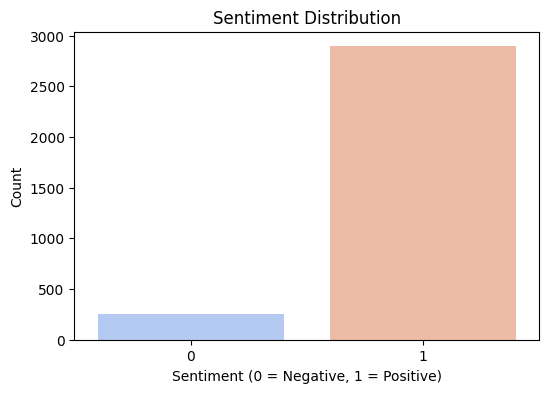

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count labels
sentiment_counts = Counter(labels)
print("Sentiment Distribution:", sentiment_counts)

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x=labels, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

## Generate Word Clouds for Different Sentiments

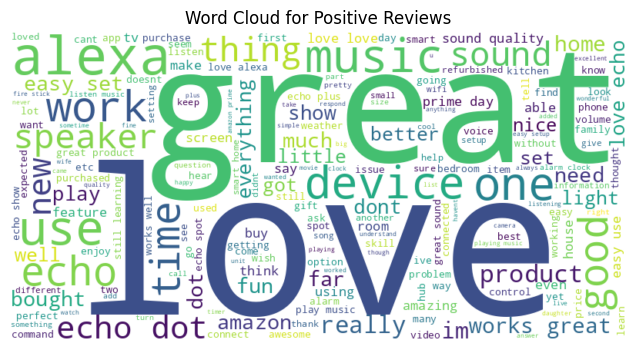

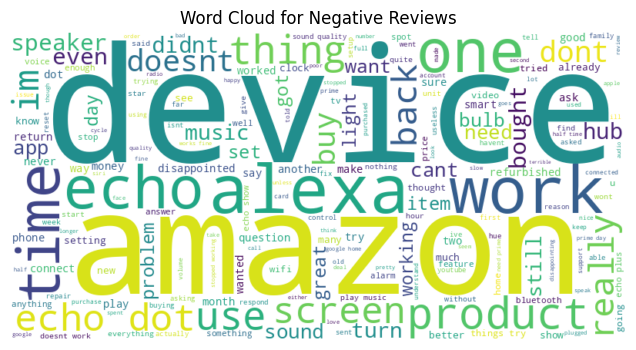

In [ ]:
from wordcloud import WordCloud

def generate_wordcloud(sentiment_value, sentiment_label):
    text = " ".join(sssb4251_df[sssb4251_df["feedback"] == sentiment_value]["cleaned_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment_label} Reviews")
    plt.show()

# Generate for both sentiment categories
generate_wordcloud(1, "Positive")
generate_wordcloud(0, "Negative")

## Handle Class Imbalance (Oversampling Negative Reviews)

In [ ]:
from sklearn.utils import resample

# Separate positive and negative reviews
positive_reviews = sssb4251_df[sssb4251_df["feedback"] == 1]
negative_reviews = sssb4251_df[sssb4251_df["feedback"] == 0]

# Oversample negative reviews to match positive class size
negative_oversampled = resample(negative_reviews,
                                replace=True,
                                n_samples=len(positive_reviews),
                                random_state=42)

# Combine both to create a balanced dataset
balanced_df = pd.concat([positive_reviews, negative_oversampled])

# Shuffle dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced Dataset Distribution:\n", balanced_df["feedback"].value_counts())

Balanced Dataset Distribution:
 feedback
0    2893
1    2893
Name: count, dtype: int64


## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Extract cleaned text and labels from the balanced dataset
reviews = balanced_df["cleaned_text"].values
labels = balanced_df["feedback"].values  # Using 'feedback' column as target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training samples: {len(X_train)} | Testing samples: {len(X_test)}")

Training samples: 4628 | Testing samples: 1158


 ## Convert Text to Sequences for Model Input

In [ ]:
# Convert train and test text to sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(train_sequences, maxlen=max_length, padding="post", truncating="post")
X_test_padded = pad_sequences(test_sequences, maxlen=max_length, padding="post", truncating="post")

print("✅ Text Tokenization & Padding Completed")
print("Sample Tokenized & Padded Sequence:", X_train_padded[0])

✅ Text Tokenization & Padding Completed
Sample Tokenized & Padded Sequence: [  4 139 476  52 971 204   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


## Build the RNN (LSTM) Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define hyperparameters
embedding_dim = 64
lstm_units = 128
dropout_rate = 0.3

# Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(lstm_units, return_sequences=False),
    Dropout(dropout_rate),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")  # Binary classification (0 = Negative, 1 = Positive)
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [ ]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_test_padded, y_test),
    epochs=10,  # Adjust as needed
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 40s 231ms/step - accuracy: 0.4907 - loss: 0.6939 - val_accuracy: 0.5035 - val_loss: 0.6930
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.5023 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6920
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 21s 147ms/step - accuracy: 0.5146 - loss: 0.7233 - val_accuracy: 0.5026 - val_loss: 0.6925
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 40s 143ms/step - accuracy: 0.5152 - loss: 0.6908 - val_accuracy: 0.5000 - val_loss: 0.6900
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 20s 137ms/step - accuracy: 0.5008 - loss: 0.6877 - val_accuracy: 0.5043 - val_loss: 0.6887
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.5464 - loss: 0.6812 - val_accuracy: 0.6701 - val_loss: 0.6374
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 41s 144ms/step - accuracy: 0.6558 - loss: 0.6330 - val_accuracy: 0.6157 - val_loss: 0.6477
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.6209 - loss: 0

## Evaluate the Model

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6440 - loss: 0.6247
Test Accuracy: 0.6304


## Visualize Training Performance

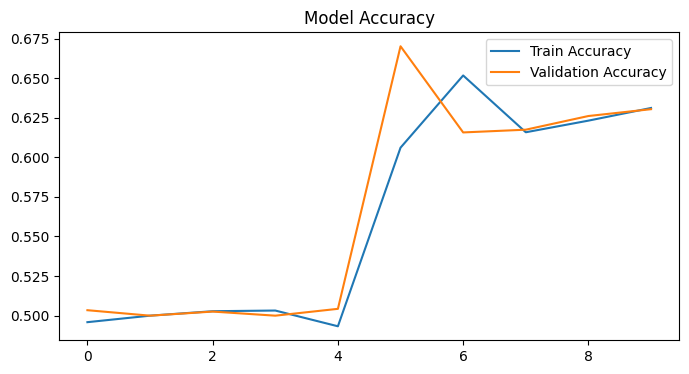

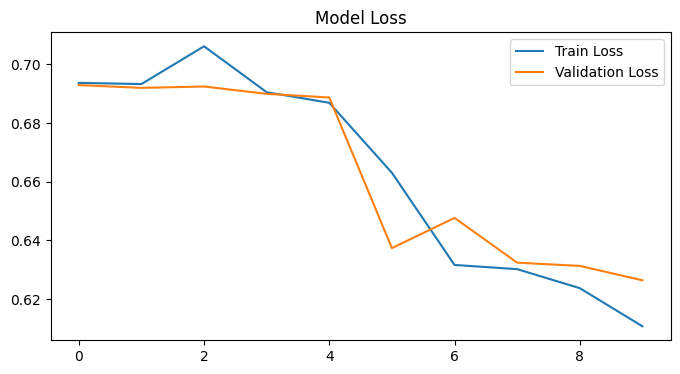

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Plot loss
plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Model Loss")
plt.show()

## How to Improve Accuracy?
#### Rebalance Data Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_padded, y_train)

print(f"Original Train Set Size: {len(X_train)} | Resampled Train Set Size: {len(X_train_resampled)}")

Original Train Set Size: 4628 | Resampled Train Set Size: 4628


## Increase Vocabulary Size

In [ ]:
vocab_size = 10000  # Increase from 5000 to 10000

## Use Pretrained Word Embeddings (GloVe)

In [ ]:
!pip install --upgrade gensim
!pip install --upgrade numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
!pip uninstall gensim -y
!pip uninstall numpy -y
!pip install gensim
!pip install numpy

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


In [ ]:
import gensim
import numpy as np

print(f"gensim version: {gensim.__version__}")
print(f"numpy version: {np.__version__}")

gensim version: 4.3.3
numpy version: 1.26.4


In [ ]:
import numpy as np
import gensim.downloader as api
from tensorflow.keras.layers import Embedding

# Load GloVe word embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Initialize vocab_size and tokenizer (ensure tokenizer is defined before using it)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding index
embedding_matrix = np.zeros((vocab_size, 100))  # Initialize matrix

# Update the embedding matrix with GloVe embeddings
for word, index in tokenizer.word_index.items():
    if index < vocab_size:
        try:
            embedding_matrix[index] = glove_model[word]  # Assign GloVe embedding
        except KeyError:
            embedding_matrix[index] = np.random.normal(scale=0.6, size=(100,))  # Random embeddings for unknown words

# Create the embedding layer with GloVe weights
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=100,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

[==================================================] 100.0% 128.1/128.1MB downloaded


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Modify the LSTM Model

In [ ]:
from tensorflow.keras.layers import Bidirectional, BatchNormalization

model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.4),
    LSTM(64, return_sequences=False),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │         422,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,400 (1.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 422,400 (1.61 MB)

## Train Longer with Learning Rate Decay

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_decay = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, min_lr=0.00001)

history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test_padded, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping, lr_decay]
)

Epoch 1/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 68s 401ms/step - accuracy: 0.5007 - loss: 0.6995 - val_accuracy: 0.5060 - val_loss: 0.6918 - learning_rate: 0.0010
Epoch 2/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 80s 387ms/step - accuracy: 0.5106 - loss: 0.6883 - val_accuracy: 0.5060 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 3/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 86s 412ms/step - accuracy: 0.5129 - loss: 0.6861 - val_accuracy: 0.5069 - val_loss: 0.6889 - learning_rate: 0.0010
Epoch 4/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 394ms/step - accuracy: 0.5249 - loss: 0.6845 - val_accuracy: 0.5069 - val_loss: 0.6873 - learning_rate: 0.0010
Epoch 5/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 82s 397ms/step - accuracy: 0.5016 - loss: 0.6865 - val_accuracy: 0.5035 - val_loss: 0.6868 - learning_rate: 0.0010
Epoch 6/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 80s 382ms/step - accuracy: 0.5389 - loss: 0.6807 - val_accuracy: 0.7332 - val_loss: 0.5882 - learning_rate: 0.0010
Epoch 7/15
145/145 ━━━━━━━━━━━━━━━━━━━━ 84s 397ms/step - accuracy: 0.7

## Evaluate Again

In [ ]:
test_loss, test_acc = model.evaluate(X_test_padded, y_test)
print(f"Improved Test Accuracy: {test_acc:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - accuracy: 0.9671 - loss: 0.1198
Improved Test Accuracy: 0.9637


## Evaluating the effectiveness of sentiment analysis model using various metrics, including accuracy, precision, recall, F1-score, and the confusion matrix.

37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 220ms/step
Test Accuracy: 0.9637

Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      0.99      0.96       579
    Positive       0.99      0.93      0.96       579

    accuracy                           0.96      1158
   macro avg       0.97      0.96      0.96      1158
weighted avg       0.97      0.96      0.96      1158



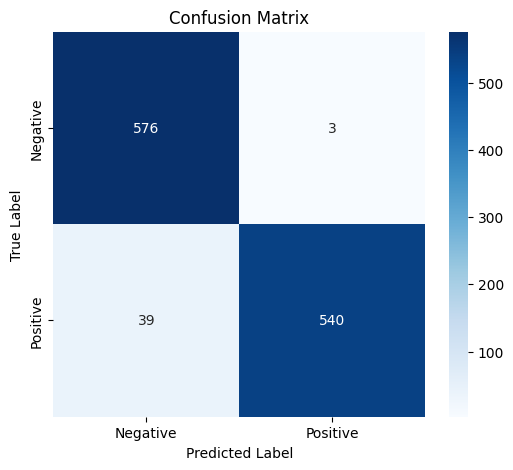

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred_probs = model.predict(X_test_padded)  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Confirming Model Predictions

In [ ]:
import numpy as np

# Define sample reviews to test
sample_reviews = [
    "This is the best product I have ever used! Totally worth it.",  # Expected: Positive
    "The worst purchase I've made. It broke in two days!",  # Expected: Negative
    "Average product, nothing special about it.",  # Expected: Neutral/Mixed
    "Terrible quality, customer support was unhelpful!",  # Expected: Negative
    "Excellent build and fast shipping. Very happy with my purchase!",  # Expected: Positive
]

# Preprocess the sample reviews
sample_reviews_cleaned = [clean_text(review) for review in sample_reviews]

# Convert to sequences and pad
sample_sequences = tokenizer.texts_to_sequences(sample_reviews_cleaned)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, padding="post", truncating="post")

# Predict sentiment
sample_predictions = model.predict(sample_padded)
sample_labels = (sample_predictions > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Display results
for review, pred in zip(sample_reviews, sample_labels):
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Review: This is the best product I have ever used! Totally worth it.
Predicted Sentiment: Positive

Review: The worst purchase I've made. It broke in two days!
Predicted Sentiment: Negative

Review: Average product, nothing special about it.
Predicted Sentiment: Negative

Review: Terrible quality, customer support was unhelpful!
Predicted Sentiment: Negative

Review: Excellent build and fast shipping. Very happy with my purchase!
Predicted Sentiment: Positive



## Test the Model on Sample Reviews

In [ ]:
import numpy as np

# Define sample reviews
sample_reviews = [
    "Absolutely love this! Works perfectly and is worth every penny.",  # Expected: Positive
    "Terrible experience. The product broke within a week!",  # Expected: Negative
    "It’s okay, but I expected something better for the price.",  # Expected: Neutral/Mixed
    "Arrived late and was damaged. Definitely not recommended.",  # Expected: Negative
    "The best purchase I have ever made. So happy with it!",  # Expected: Positive
]

# Step 1: Preprocess the text
sample_reviews_cleaned = [clean_text(review) for review in sample_reviews]

# Step 2: Tokenize and pad sequences
sample_sequences = tokenizer.texts_to_sequences(sample_reviews_cleaned)
sample_padded = pad_sequences(sample_sequences, maxlen=max_length, padding="post", truncating="post")

# Step 3: Predict sentiment scores (probabilities)
sample_predictions = model.predict(sample_padded)

# Step 4: Convert probabilities to binary labels (adjust threshold if needed)
threshold = 0.5  # Adjust this if needed (e.g., 0.4 or 0.6)
sample_labels = (sample_predictions > threshold).astype(int)

# Step 5: Display results
for review, prob, label in zip(sample_reviews, sample_predictions, sample_labels):
    sentiment = "Positive" if label == 1 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment} (Confidence: {prob[0]:.4f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Review: Absolutely love this! Works perfectly and is worth every penny.
Predicted Sentiment: Positive (Confidence: 0.9947)

Review: Terrible experience. The product broke within a week!
Predicted Sentiment: Negative (Confidence: 0.1145)

Review: It’s okay, but I expected something better for the price.
Predicted Sentiment: Positive (Confidence: 0.9935)

Review: Arrived late and was damaged. Definitely not recommended.
Predicted Sentiment: Positive (Confidence: 0.9876)

Review: The best purchase I have ever made. So happy with it!
Predicted Sentiment: Positive (Confidence: 0.9947)



-END OF THE PROJECT-